Metrics:
- Sensitivity (Recall) - What % of real events got detected? $\frac{TP}{TP+FN}$
- Specificity - What % of no events got detected? $\frac{TN}{TN+FP}$
- Precision - What % of predicted events where real events? $\frac{TP}{TP+FP}$

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
runs = ['attention_none', 'denoising_lowpass', 'denoising_bandpass', 'denoising_wavelet_db4', 'denoising_wavelet_dmey', 'denoising_wavelet_haar']
data = pd.read_csv('52_denoised_results.csv')

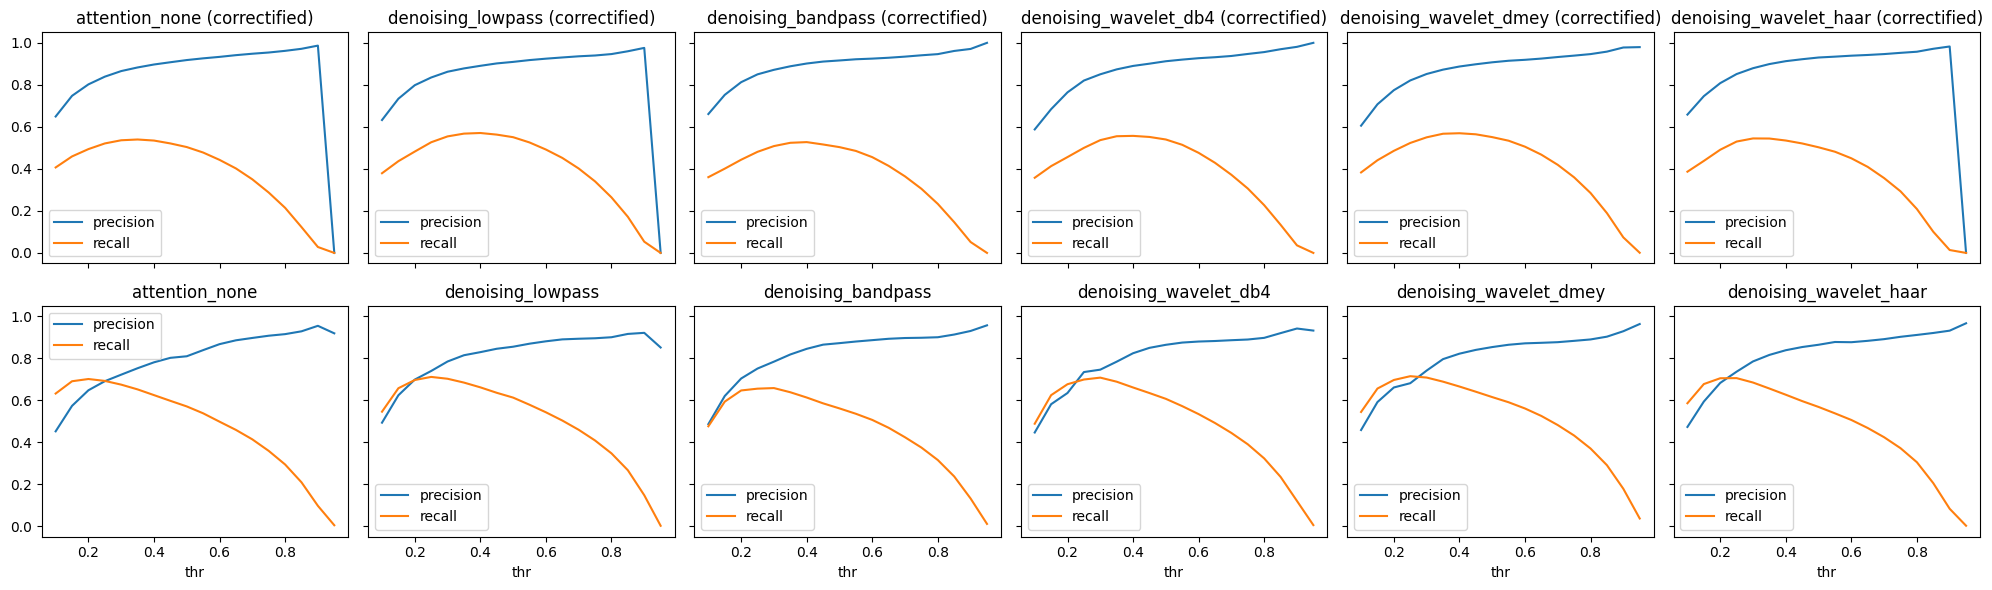

In [4]:
_, axs = plt.subplots(2, len(runs), figsize=(20, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'precision', 'recall']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

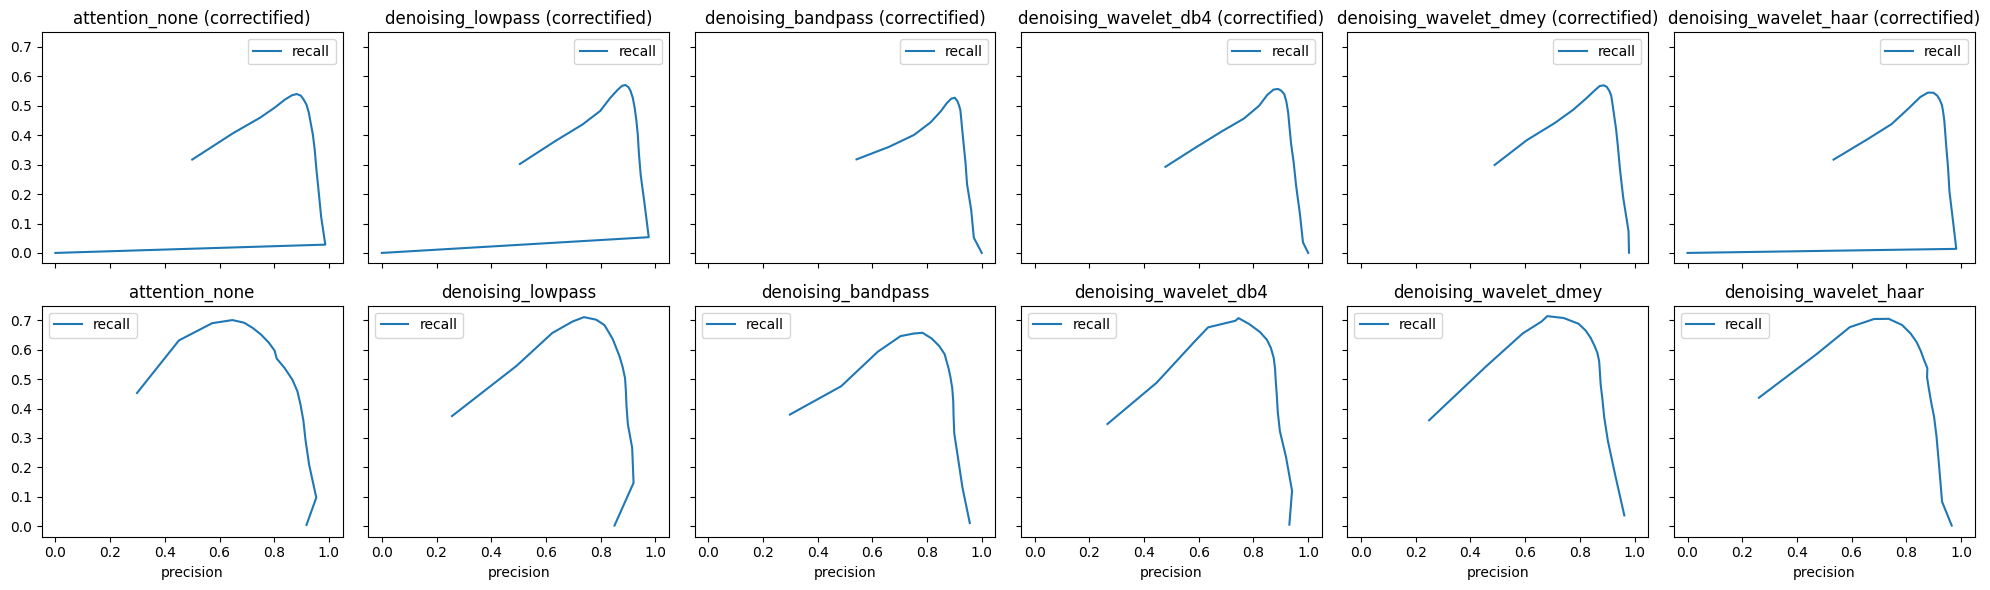

In [5]:
_, axs = plt.subplots(2, len(runs), figsize=(20, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['precision', 'recall']].set_index('precision').plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

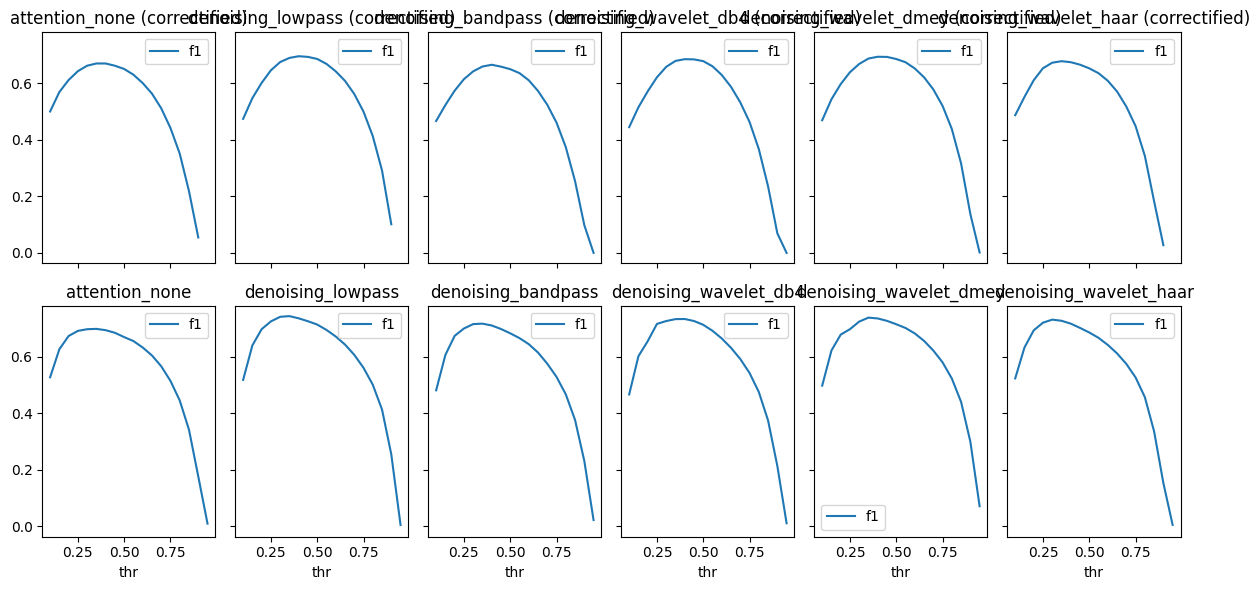

In [6]:
_, axs = plt.subplots(2, len(runs), figsize=(12, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr').iloc[1:20].plot(ax=axs[row, col], title=f'{run}{' (correctified)' if correctify else ''}')
plt.tight_layout()

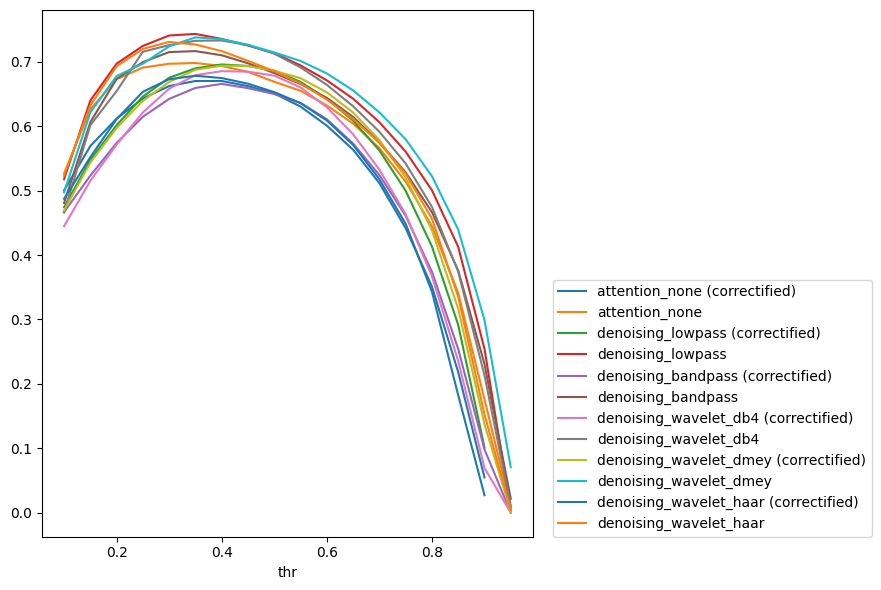

In [7]:
_, axs = plt.subplots(1, 1, figsize=(9, 6), sharex=True, sharey=True)
for col, run in enumerate(runs):
    for row, correctify in enumerate([True, False]):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{run}{' (correctified)' if correctify else ''}']
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

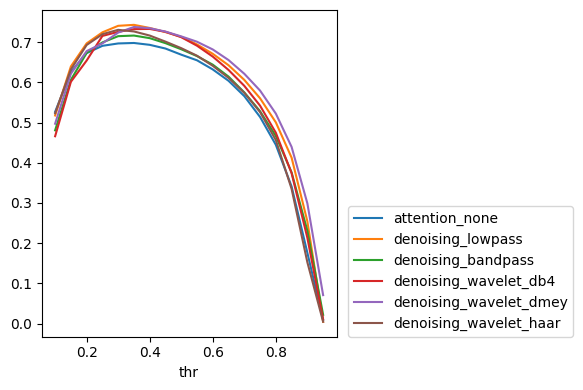

In [8]:
_, axs = plt.subplots(1, 1, figsize=(6, 4), sharex=True, sharey=True)
for col, run in enumerate(runs):
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == False)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [run]
        f1_by_thr.iloc[1:20].plot(ax=axs)
plt.legend(loc=(1.04, 0))
plt.tight_layout()

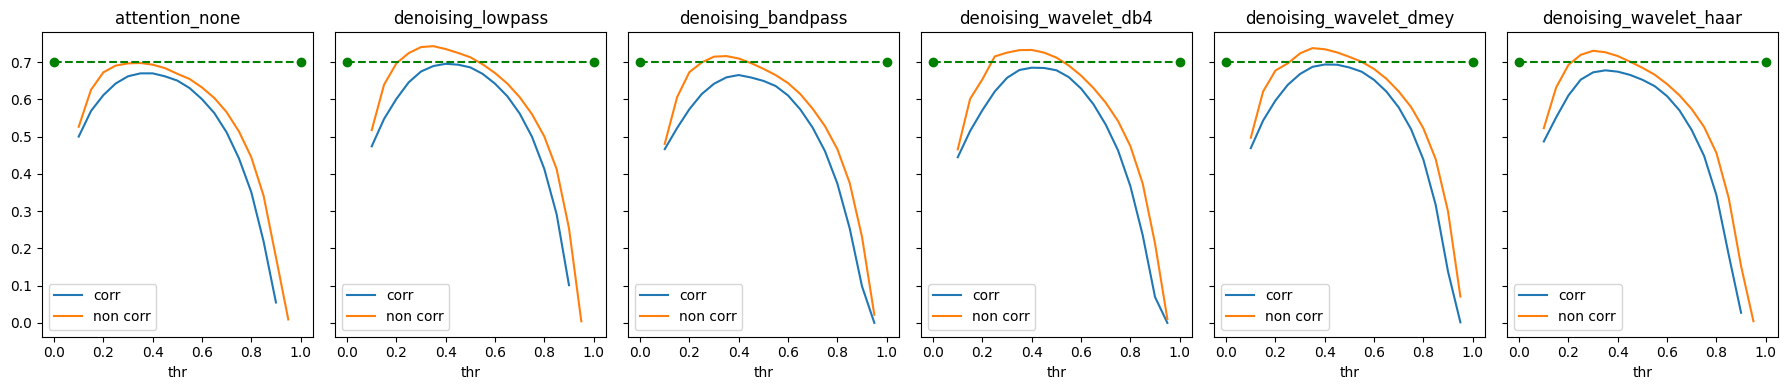

In [9]:
_, axs = plt.subplots(1, len(runs), figsize=(len(runs)*3, 4), sharex=True, sharey=True)
for i, run in enumerate(runs):
    for correctify in [True, False]:
        f1_by_thr = data[(data['run'] == run) & (data['correctify'] == correctify)][['thr', 'f1']].set_index('thr')
        f1_by_thr.columns = [f'{'corr' if correctify else 'non corr'}']
        f1_by_thr.iloc[1:20].plot(ax=axs[i], title=run)
    axs[i].plot([0,1], [0.7]*2, color='green', linestyle='dashed', marker='o')
plt.tight_layout()

In [10]:
# These are all just Fold 0